# Lineární klasifikace do více tříd pomocí funkce Softmax

Úloha zaměřená na implementaci paralelního lineární klasifikáru pomocí funkce softmax.


### Softmax
- Funkce softmax má c vstupů a c výstupů. 
- Všechny výstupy jsou kladná čísla. 
- Součet všech výstupů dohromady je roven číslu 1.
$$\widehat{y_c} = softmax(u) = \frac{e^{u_c}}{\sum_{d=0}^{c} {e^{u_d}}} $$

Výsledkem klasifikace je třída, pro kterou je hodnota softmaxu nejvyšší.

### Odhad parametrů modelu

Model nemá jeden vektor parametrů $\theta$, ale matici parametrů $\Theta$

Příklad:
- Vektor $x$ má dimenzi 3 (3 příznaky)
- Klasifikujeme do 4 tříd
$$ \Theta^T = 
        \begin{bmatrix}
        [\theta_{00} & \theta_{01} & \theta_{02} & \theta_{03}] \\
        [\theta_{10} & \theta_{11} & \theta_{12} & \theta_{13}] \\
        [\theta_{20} & \theta_{21} & \theta_{22} & \theta_{23}] \\
        [\theta_{30} & \theta_{31} & \theta_{32} & \theta_{33}] \\
        \end{bmatrix}  $$

#### Pomoc sumy:

$$ \Theta_{t+1} = \Theta_{t} - \alpha \sum_{i=0}^{N} {x_i}^T (\widehat{y_i} - y_i) $$  
kde $\alpha$ je velikost kroku (learning rate), 

$y_i$ je vektor, obsahující hodnotu 1 na indexu správné třídy: $y_i \in [...0, 0, 1, 0,..]$,

$\widehat{y_i} = softmax(x_i^T \Theta)^T$


#### Pomocí  matice:
Maticová implementace je řádově výpočetně efektivnější.

$$ \Theta_{t+1} = \Theta_{t} - \alpha X^T (\widehat{Y} - Y) $$  
$Y$ je matice nul a jedniček dle indexů tříd v datech (one_hot_encoding), 

#### Postup:
1. Parametr $\theta$ (resp. váhy $w$ a bias $b$) se inicializuje na malé náhodné hodnoty
2. Na vstup se přivedou všechna trénovací data a na výstupu se tím pádem objeví posloupnost nul a jedniček (obsahuje chyby)
3. Na základě chyb se upraví hodnoty vah
4. Kroky 2. a 3. se postupně opakují dokud dostatečně klesá chybovost klasifikátoru (nebo podle počtu iteraci)



### Klasifikace pro 2 třídy:


In [2]:
import numpy as np
import usu

npzfile = np.load('data/data_07_2cl.npz')

data = npzfile['data']
ref = npzfile['ref']
data.shape, ref.shape



((100, 2), (100, 1))

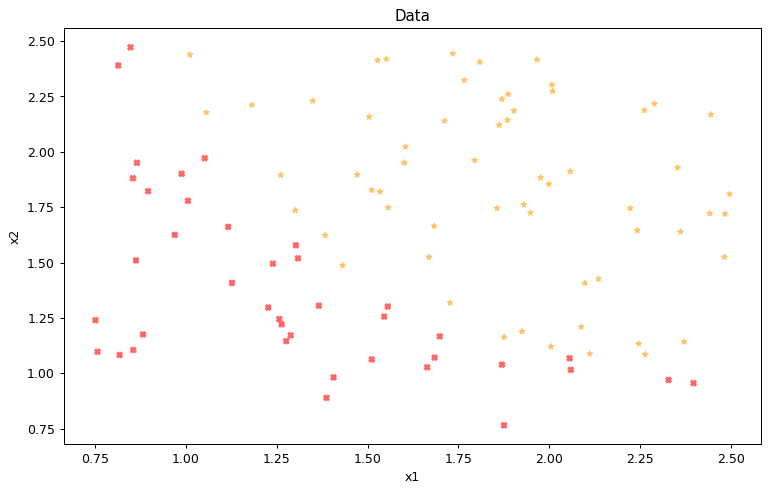

In [3]:
usu.drawSoftmax(data,ref)


In [4]:
def softmax(u):
    """
    vstupem muze byt skalar, vektor, nebo matice 
    """

    return np.exp(u) / np.sum(np.exp(u), axis=0, keepdims=True)
    # u_max = np.max(u, axis=0, keepdims=True)
    # exp_u = np.exp(u - u_max)
    # return exp_u / np.sum(exp_u, axis=0, keepdims=True)

res = usu.checkSoftmax(softmax)
print(res)

True


In [5]:
def one_hot_encoding(y: np.ndarray) -> np.ndarray:
    num_classes = len(np.unique(y))

    y_onehot = np.zeros((y.shape[0], num_classes))

    for i in range(y.shape[0]):
        y_onehot[i, y[i]] = 1

    return y_onehot

In [7]:
def computeThetaSGD(x, y, alpha=0.01, iterations=1000):
    #################################################################
    # ZDE DOPLNIT

    x = np.c_[np.ones(np.size(x,0)), x] # pridani sloupce pro bias

    #inicializace theta
    nClasses = np.size(np.unique(y))
    theta = np.zeros([np.size(x,1), nClasses])

    #one hot encoding
    shape_y = (y.size, y.max() + 1)
    rows = np.arange(y.size)

    one_hot = np.zeros(shape_y)
    one_hot[rows,y.T] = 1

    for i in range(iterations):
        theta = theta - alpha * ((softmax(theta.T @ x.T).T - one_hot).T @ x).T
    #################################################################

    return theta

In [8]:
theta = computeThetaSGD(data, ref)
theta

array([[ 9.10851553, -9.10851553],
       [-3.01430677,  3.01430677],
       [-2.90413336,  2.90413336]])

In [ ]:
usu.drawSoftmax(data, ref, theta, softmax)


In [ ]:
def predict(x,theta):
    #################################################################
    # ZDE DOPLNIT

    # add bias column to input data
    x = np.insert(x, 0, 1, axis=1)

    # apply forward pass of neural network
    predictions = softmax(x @ theta)

    # convert predictions to class labels
    predicted_classes = np.argmax(predictions, axis=1)

#################################################################
    return predicted_classes


In [ ]:
x_pred = np.array([[1, 1],[ 2, 2]])
predict(x_pred,theta)


### Klasifikace pro více tříd:
#### 3 třídy:


In [ ]:
npzfile = np.load('data/data_07_3cl_ez.npz') 

data = npzfile['data']
ref = npzfile['ref']

In [ ]:
theta = computeThetaSGD(data, ref)
theta

In [ ]:
usu.drawSoftmax(data, ref, theta, softmax)


In [ ]:
x_pred = np.array([[-3, 1],[ 0, -2],[ 3, 2]])
predict(x_pred,theta)


#### 4 třídy:

In [ ]:
npzfile = np.load('data/data_07_4cl.npz')

data = npzfile['data']
ref = npzfile['ref']


In [ ]:
theta = computeThetaSGD(data, ref)
theta

In [ ]:
usu.drawSoftmax(data, ref, theta, softmax)


In [ ]:
x_pred = np.array([[-3, -1],[ -3, 2],[ 3, -1],[ 3, 2]])
predict(x_pred,theta)


#### 5 tříd:

In [ ]:
npzfile = np.load('data/data_07_5cl.npz')

data = npzfile['data']
ref = npzfile['ref']


In [ ]:
theta = computeThetaSGD(data, ref)
theta

In [ ]:
usu.drawSoftmax(data, ref, theta, softmax)


In [ ]:
x_pred = np.array([[-3, -1],[ -3, 2],[ 3, -1],[ 3, 2],[0, 0]])
predict(x_pred,theta)
